<a href="https://www.kaggle.com/code/mohamedraddwan/covid?scriptVersionId=247038100" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
#df = pd.read_csv('owid-covid-data.csv')

In [4]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [5]:
df_Oceania = df[df['continent'] == 'Oceania']

In [6]:
df_Oceania

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6696,ASM,Oceania,American Samoa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6697,ASM,Oceania,American Samoa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6698,ASM,Oceania,American Samoa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6699,ASM,Oceania,American Samoa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6700,ASM,Oceania,American Samoa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422723,WLF,Oceania,Wallis and Futuna,2024-07-31,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422724,WLF,Oceania,Wallis and Futuna,2024-08-01,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422725,WLF,Oceania,Wallis and Futuna,2024-08-02,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422726,WLF,Oceania,Wallis and Futuna,2024-08-03,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN


In [7]:
df_Oceania.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
df_Oceania.columns.to_list()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [9]:
df_Oceania.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.017600e+04,40172.000000,40052.000000,40176.000000,40174.000000,40054.000000,40176.000000,40172.00000,40052.000000,40176.000000,...,16747.000000,5022.00000,15073.000000,38509.000000,20095.000000,4.018300e+04,511.000000,511.000000,511.000000,511.000000
mean,2.886812e+05,373.480733,374.561015,595.723865,0.822024,0.824151,113796.869291,151.93050,152.359055,315.667925,...,35.272443,47.86700,3.016478,73.656787,0.714159,1.877198e+06,4005.626198,0.174442,4.606301,167.600603
std,1.576748e+06,8810.385914,3316.909508,2999.507739,15.533735,5.830185,155227.361320,2719.29118,1019.617757,564.209327,...,12.937861,24.87828,1.183257,5.869866,0.125015,5.523563e+06,10658.878547,4.489610,18.710440,597.373613
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,16.500000,25.20900,1.400000,59.960000,0.555000,4.700000e+01,-3734.400000,-15.650000,-24.740000,-547.982060
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,22.700000,25.20900,2.300000,68.370000,0.620000,1.703200e+04,-1664.099950,-2.635000,-2.555000,-157.464625
50%,2.914000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,27582.498000,0.00000,0.000000,43.383000,...,34.800000,35.89000,2.610000,73.700000,0.715000,1.141780e+05,-49.800000,-0.240000,3.310000,-13.965896
75%,1.680700e+04,0.000000,2.143000,58.000000,0.000000,0.000000,236764.660000,0.00000,8.861000,502.873000,...,44.400000,82.50200,3.840000,77.660000,0.826000,3.267440e+05,600.300050,3.360000,8.855000,408.991960
max,1.186116e+07,588813.000000,84116.143000,25236.000000,1161.000000,165.857000,582429.500000,230762.55000,32966.079000,2536.427000,...,58.900000,82.50200,5.000000,83.440000,0.944000,2.617741e+07,36645.200000,18.780000,276.240000,2112.338900


In [10]:
df_Oceania.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,40176.0,2.886812e+05,1.576748e+06,0.00000,0.000000,2914.000000,16807.00000,1.186116e+07
new_cases,40172.0,3.734807e+02,8.810386e+03,0.00000,0.000000,0.000000,0.00000,5.888130e+05
new_cases_smoothed,40052.0,3.745610e+02,3.316910e+03,0.00000,0.000000,0.000000,2.14300,8.411614e+04
total_deaths,40176.0,5.957239e+02,2.999508e+03,0.00000,0.000000,2.000000,58.00000,2.523600e+04
new_deaths,40174.0,8.220242e-01,1.553374e+01,0.00000,0.000000,0.000000,0.00000,1.161000e+03
...,...,...,...,...,...,...,...,...
population,40183.0,1.877198e+06,5.523563e+06,47.00000,17032.000000,114178.000000,326744.00000,2.617741e+07
excess_mortality_cumulative_absolute,511.0,4.005626e+03,1.065888e+04,-3734.40000,-1664.099950,-49.800000,600.30005,3.664520e+04
excess_mortality_cumulative,511.0,1.744423e-01,4.489610e+00,-15.65000,-2.635000,-0.240000,3.36000,1.878000e+01
excess_mortality,511.0,4.606301e+00,1.871044e+01,-24.74000,-2.555000,3.310000,8.85500,2.762400e+02


In [11]:
df_Oceania.describe(include = "object")

,iso_code,continent,location,date,tests_units
count,40183,40183,40183,40183,4450
unique,24,1,24,1681,2
top,NZL,Oceania,New Zealand,2020-01-05,tests performed
freq,1681,40183,1681,24,4441


## Data Cleaning

In [12]:
df_Oceania = df_Oceania.dropna(how='all')
df_Oceania

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6696,ASM,Oceania,American Samoa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6697,ASM,Oceania,American Samoa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6698,ASM,Oceania,American Samoa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6699,ASM,Oceania,American Samoa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
6700,ASM,Oceania,American Samoa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422723,WLF,Oceania,Wallis and Futuna,2024-07-31,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422724,WLF,Oceania,Wallis and Futuna,2024-08-01,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422725,WLF,Oceania,Wallis and Futuna,2024-08-02,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
422726,WLF,Oceania,Wallis and Futuna,2024-08-03,3760.0,0.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN


In [13]:
df_Oceania.duplicated().sum()

0

In [14]:
df_Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40183 entries, 6696 to 422727
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    40183 non-null  object 
 1   continent                                   40183 non-null  object 
 2   location                                    40183 non-null  object 
 3   date                                        40183 non-null  object 
 4   total_cases                                 40176 non-null  float64
 5   new_cases                                   40172 non-null  float64
 6   new_cases_smoothed                          40052 non-null  float64
 7   total_deaths                                40176 non-null  float64
 8   new_deaths                                  40174 non-null  float64
 9   new_deaths_smoothed                         40054 non-null  float64
 10  total_cases

In [15]:
df_Oceania['date'] = pd.to_datetime(df_Oceania['date'])

In [16]:
df_Oceania['continent'].dtype

dtype('O')

In [17]:
df_Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40183 entries, 6696 to 422727
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    40183 non-null  object        
 1   continent                                   40183 non-null  object        
 2   location                                    40183 non-null  object        
 3   date                                        40183 non-null  datetime64[ns]
 4   total_cases                                 40176 non-null  float64       
 5   new_cases                                   40172 non-null  float64       
 6   new_cases_smoothed                          40052 non-null  float64       
 7   total_deaths                                40176 non-null  float64       
 8   new_deaths                                  40174 non-null  float64       
 9   new_dea

# Analyzing Oceania continent data
## "Which Oceania Countries Currently Lead in GDP per Capita?"

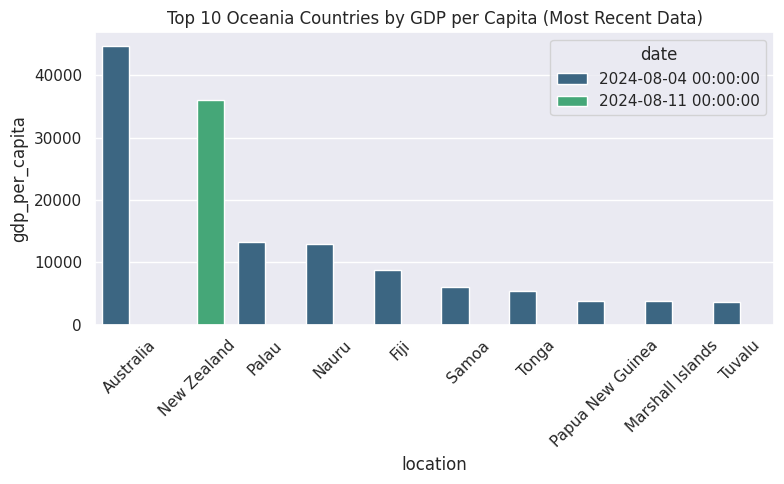

In [18]:

# Get the latest record per country
latest_gdp = df_Oceania.sort_values('date').groupby('location').tail(1)

latest_gdptop_10 = latest_gdp.sort_values('gdp_per_capita', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=latest_gdptop_10, x='location', y='gdp_per_capita',hue='date',palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Oceania Countries by GDP per Capita (Most Recent Data)')
plt.tight_layout()
plt.show()

## Which Oceania Countries Had the Highest COVID Impact per Million People?

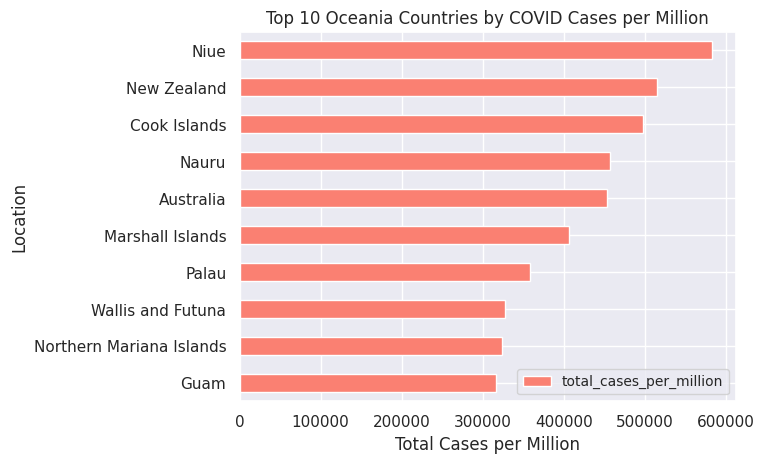

In [19]:
df_latest = df_Oceania.sort_values('date').groupby('location').last().reset_index()
df_top10 = df_latest.sort_values('total_cases_per_million',ascending=False).head(10)

df_top10.plot(kind='barh', x='location', y='total_cases_per_million',color='salmon')
plt.xlabel('Total Cases per Million')
plt.ylabel('Location')
plt.title('Top 10 Oceania Countries by COVID Cases per Million')
plt.legend(loc='lower right', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

In [20]:
# Top 5 locations with highest total cases

top_locations = df_latest.sort_values('total_cases',ascending=False).head(5)


In [21]:
summary = top_locations[[
    'location',
    'total_cases_per_million',
    
    'total_deaths_per_million',
    
    'people_fully_vaccinated_per_hundred',

    'people_fully_vaccinated_per_hundred',
    
    'population'
]].round(2).sort_values('total_cases_per_million',ascending=False)
print(summary)


            location  total_cases_per_million  total_deaths_per_million  \
11       New Zealand                514260.60                    834.81   
1          Australia                452699.00                    963.17   
4   French Polynesia                283131.66                   2318.21   
10     New Caledonia                279186.16                   1093.58   
3               Fiji                 75097.78                    962.56   

    people_fully_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
11                                82.77                                82.77   
1                                 82.70                                82.70   
4                                 60.99                                60.99   
10                                63.74                                63.74   
3                                 68.96                                68.96   

    population  
11     5185289  
1     26177410  
4       306292  


In [22]:
Top_locations_list =df_latest.sort_values('total_cases',ascending=False).head(5)['location'].tolist()
print("Top locations by total cases:", Top_locations_list)

Top locations by total cases: ['Australia', 'New Zealand', 'New Caledonia', 'French Polynesia', 'Fiji']


In [23]:
for loc in Top_locations_list:
    count = df_Oceania[(df_Oceania['location'] == loc) & (df_Oceania['people_fully_vaccinated_per_hundred'].notna())].shape[0]
    print(f"{loc}: {count} data points")

Australia: 471 data points
New Zealand: 787 data points
New Caledonia: 100 data points
French Polynesia: 70 data points
Fiji: 95 data points


## How Often Was Vaccination Progress Tracked Across Oceania?

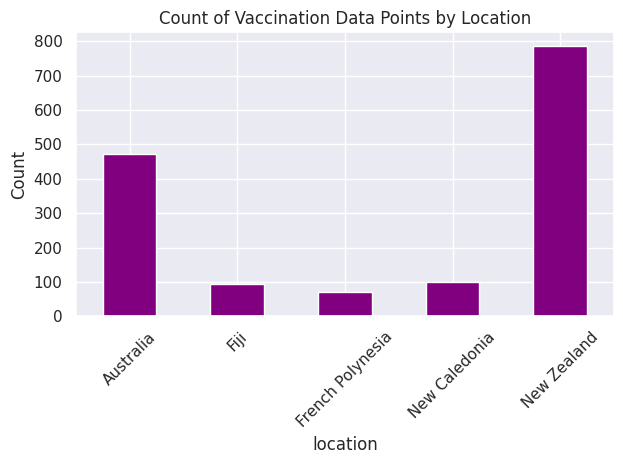

In [24]:
vax_counts = df_Oceania[df_Oceania['location'].isin(Top_locations_list)].groupby('location')['people_fully_vaccinated_per_hundred'].count()
vax_counts.plot(kind='bar', color='purple')
plt.title('Count of Vaccination Data Points by Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## How Did COVID Cases Trends Evolve Over Time in Oceania’s Top 5 Affected Countries?

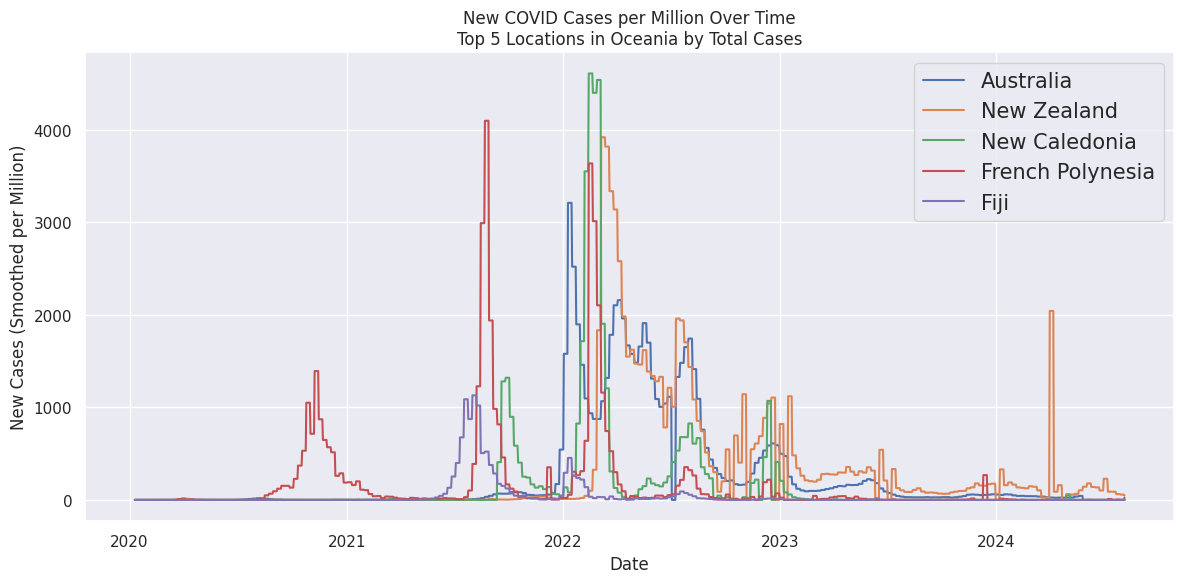

In [25]:
plt.figure(figsize=(12, 6))

for loc in Top_locations_list:
    temp = df_Oceania[df_Oceania['location'] == loc]
    plt.plot(temp['date'], temp['new_cases_smoothed_per_million'], label=loc)

plt.title('New COVID Cases per Million Over Time\nTop 5 Locations in Oceania by Total Cases')
plt.xlabel('Date')
plt.ylabel('New Cases (Smoothed per Million)')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

## 💥 Goal: Analyze how effective vaccines were in reducing COVID impact

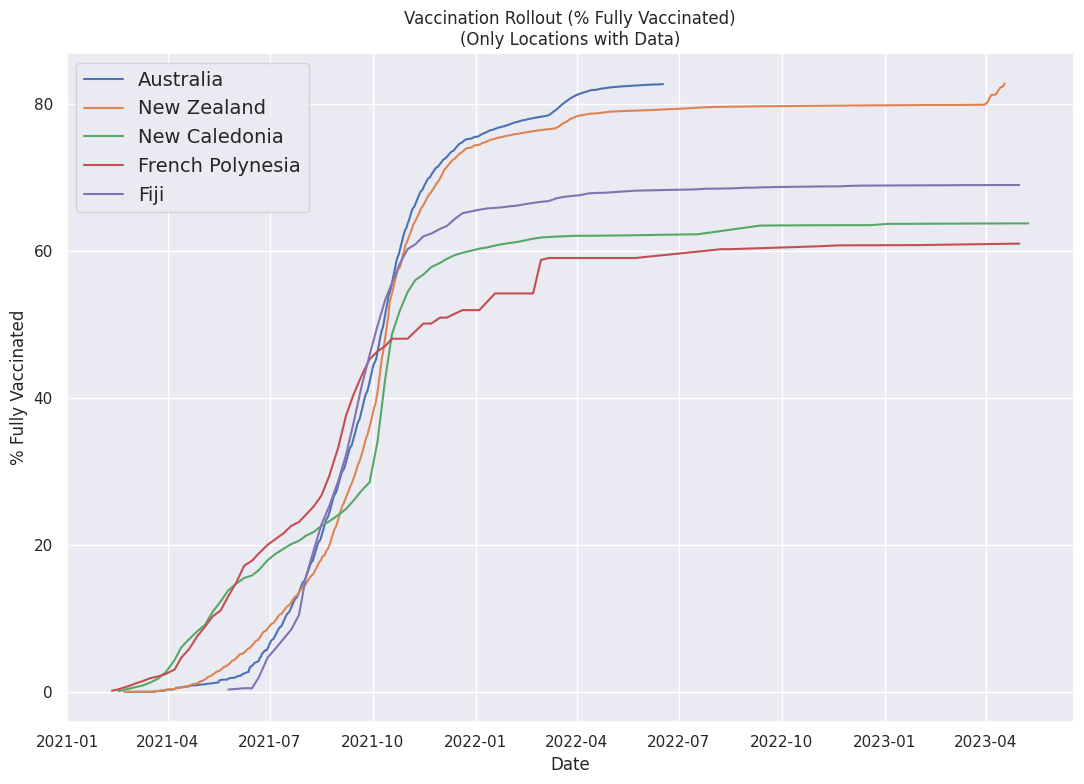

In [26]:
plt.figure(figsize=(11, 8))

for loc in Top_locations_list:
    temp = df_Oceania[(df_Oceania['location'] == loc) & (df_Oceania['people_fully_vaccinated_per_hundred'].notna())]
    if not temp.empty:
        plt.plot(temp['date'], temp['people_fully_vaccinated_per_hundred'], label=loc )

plt.title('Vaccination Rollout (% Fully Vaccinated)\n(Only Locations with Data)')
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
df_latest['deaths_per_case'] = df_latest['total_deaths'] / df_latest['total_cases']


In [28]:
df_latest[['location', 'total_cases', 'total_deaths', 'deaths_per_case']].sort_values('deaths_per_case', ascending=False).head()


,location,total_cases,total_deaths,deaths_per_case
15,Papua New Guinea,46864.0,670.0,0.014297
3,Fiji,69047.0,885.0,0.012817
4,French Polynesia,79387.0,650.0,0.008188
5,Guam,52287.0,419.0,0.008013
18,Solomon Islands,25954.0,199.0,0.007667


In [29]:
df_latest[['location', 'total_cases', 'total_deaths', 'deaths_per_case']].sort_values('deaths_per_case', ascending=False).head()


,location,total_cases,total_deaths,deaths_per_case
15,Papua New Guinea,46864.0,670.0,0.014297
3,Fiji,69047.0,885.0,0.012817
4,French Polynesia,79387.0,650.0,0.008188
5,Guam,52287.0,419.0,0.008013
18,Solomon Islands,25954.0,199.0,0.007667


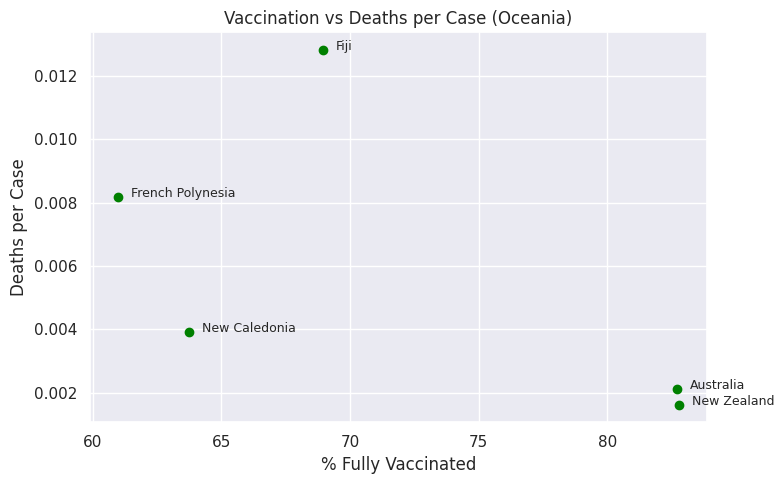

In [30]:

plt.figure(figsize=(8, 5))

for _, row in df_latest[df_latest['location'].isin(Top_locations_list)].iterrows():
    x = row['people_fully_vaccinated_per_hundred']
    y = row['deaths_per_case']
    plt.scatter(x, y, color='green')
    plt.text(x + 0.5, y, row['location'], fontsize=9)

plt.title('Vaccination vs Deaths per Case (Oceania)')
plt.xlabel('% Fully Vaccinated')
plt.ylabel('Deaths per Case')
plt.grid(True)
plt.tight_layout()
plt.show()


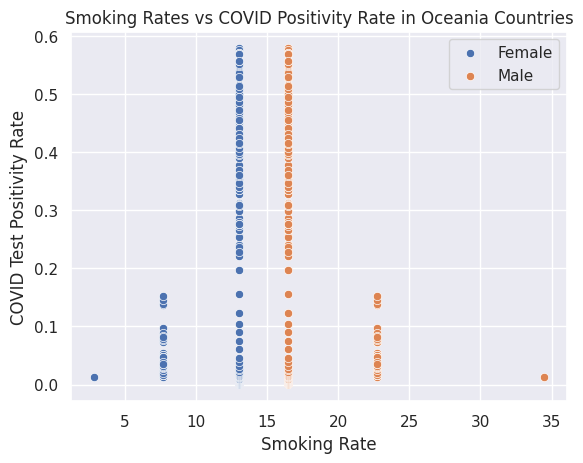

In [31]:

cols = ['location', 'positive_rate', 'female_smokers', 'male_smokers']
df_smoking_covid = df_Oceania[cols].dropna()

sns.scatterplot(data=df_smoking_covid, x='female_smokers', y='positive_rate', label='Female')
sns.scatterplot(data=df_smoking_covid, x='male_smokers', y='positive_rate', label='Male')
plt.title('Smoking Rates vs COVID Positivity Rate in Oceania Countries')
plt.xlabel('Smoking Rate')
plt.ylabel('COVID Test Positivity Rate')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
df_latest[df_latest['location'].isin(Top_locations_list)][['location', 'hospital_beds_per_thousand', 'deaths_per_case']]

,location,hospital_beds_per_thousand,deaths_per_case
1,Australia,3.84,0.002128
3,Fiji,2.30,0.012817
4,French Polynesia,NaN,0.008188
10,New Caledonia,NaN,0.003917
11,New Zealand,2.61,0.001623


In [33]:
# Normalize each feature to 0–1
from sklearn.preprocessing import MinMaxScaler

features = ['people_fully_vaccinated_per_hundred', 'gdp_per_capita', 'stringency_index', 'deaths_per_case']
data = df_latest[df_latest['location'].isin(Top_locations_list)][['location'] + features].dropna()

# Invert deaths_per_case (low = good)
data['deaths_per_case'] = 1 - data['deaths_per_case']

# Normalize
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[features])
data['survival_score'] = scaled.mean(axis=1)


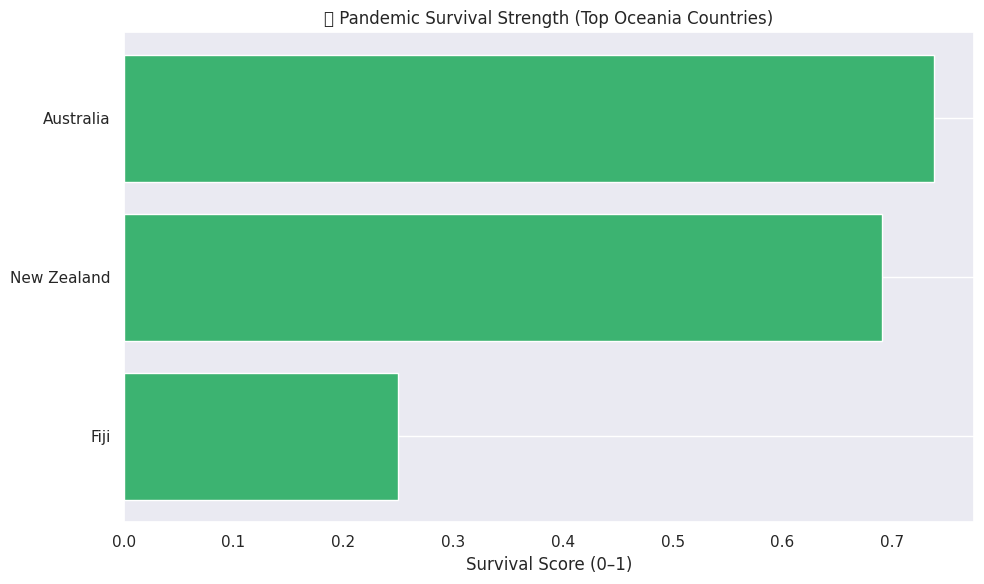

In [34]:
data = data.sort_values('survival_score')

plt.figure(figsize=(10, 6))
plt.barh(data['location'], data['survival_score'], color='mediumseagreen')
plt.title('🌍 Pandemic Survival Strength (Top Oceania Countries)')
plt.xlabel('Survival Score (0–1)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [35]:
# Example: Find first date when a country hits 50% vaccinated
vax_milestone = df_Oceania[~df_Oceania['people_vaccinated_per_hundred'].isna()]
vax_milestone['people_vaccinated_per_hundred']


22189      0.00
22190      0.01
22191      0.03
22192      0.06
22193      0.09
          ...  
421798    53.04
421839    55.62
421860    55.91
422070    61.54
422168    61.66
Name: people_vaccinated_per_hundred, Length: 1892, dtype: float64

In [36]:
# Example: Find first date when a country hits 50% vaccinated
vax_milestone = df_Oceania[df_Oceania['people_vaccinated_per_hundred'] >= 50].groupby('location')['date'].min().reset_index()


In [37]:


# Calculate the milestone date when Oceania hit 50% vaccinated (on average)
milestone_date = df_Oceania[df_Oceania['people_vaccinated_per_hundred'] >= 50]['date'].min()

# Split data into before and after that date
before = df_Oceania[df_Oceania['date'] < milestone_date][['new_cases_per_million', 'new_deaths_per_million']].mean()
after = df_Oceania[df_Oceania['date'] >= milestone_date][['new_cases_per_million', 'new_deaths_per_million']].mean()

In [38]:
before = np.nan_to_num(before, nan=0)
after= np.nan_to_num(after, nan=0)

In [39]:
# Pick a reasonable milestone — when most of the continent had *some* vaccine coverage
milestone = '2021-06-01'  # You can tweak this date based on data patterns

# Split data into before and after
before = df_Oceania[df_Oceania['date'] < milestone][['new_cases_per_million', 'new_deaths_per_million']].mean()
after = df_Oceania[df_Oceania['date'] >= milestone][['new_cases_per_million', 'new_deaths_per_million']].mean()

# Show results
print("Before vaccination rollout (approx.):\n", before.round(2))
print("\nAfter vaccination rollout (approx.):\n", after.round(2))

Before vaccination rollout (approx.):
 new_cases_per_million     13.22
new_deaths_per_million     0.17
dtype: float64

After vaccination rollout (approx.):
 new_cases_per_million     213.23
new_deaths_per_million      0.42
dtype: float64


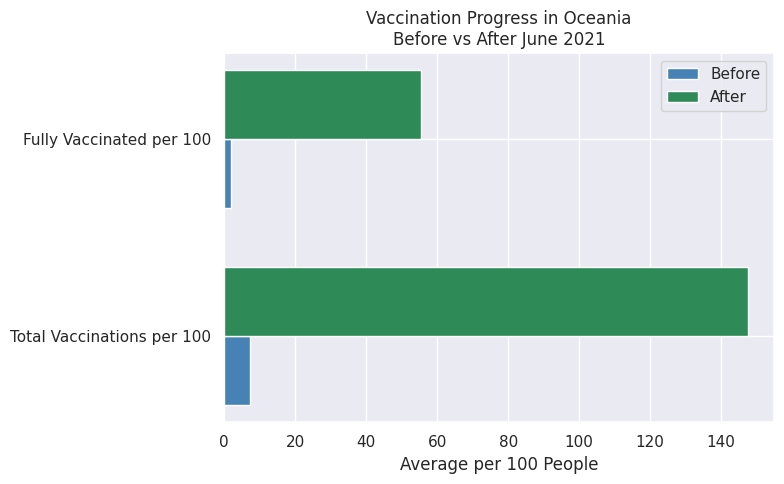

In [40]:
labels = ['Total Vaccinations per 100', 'Fully Vaccinated per 100']

before_values = np.array(df_Oceania[df_Oceania['date'] < milestone][
    ['total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred']].mean())

after_values = np.array(df_Oceania[df_Oceania['date'] >= milestone][
    ['total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred']].mean())

y = np.arange(len(labels))
bar_height = 0.35

plt.figure(figsize=(8, 5))
plt.barh(y, before_values, height=bar_height, label='Before', color='steelblue')
plt.barh(y + bar_height, after_values, height=bar_height, label='After', color='seagreen')

plt.yticks(y + bar_height / 2, labels)
plt.xlabel('Average per 100 People')
plt.title('Vaccination Progress in Oceania\nBefore vs After June 2021')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
top_10_countries = latest_gdptop_10['location'].unique()
top_10_countries

array(['Australia', 'New Zealand', 'Palau', 'Nauru', 'Fiji', 'Samoa',
       'Tonga', 'Papua New Guinea', 'Marshall Islands', 'Tuvalu'],
      dtype=object)

## Analysis of Australia Country

In [42]:
df_Aus = df_Oceania[df_Oceania['location'] == 'Australia']

In [43]:
df_Aus.columns.to_list()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

## How Did COVID Testing Compare to New Cases Over Time in Australia?

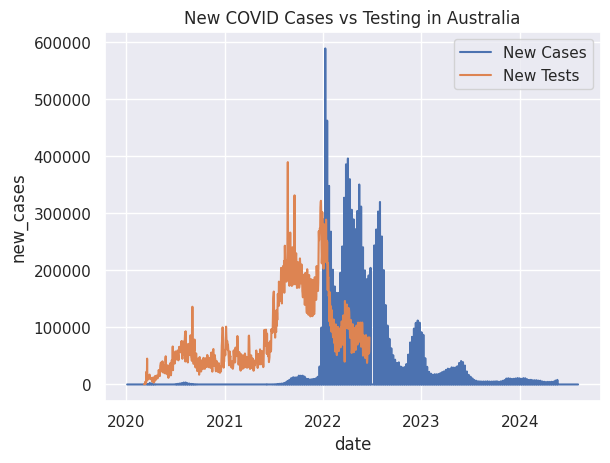

In [44]:
sns.lineplot(data=df_Aus, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=df_Aus, x='date', y='new_tests', label='New Tests')
plt.title('New COVID Cases vs Testing in Australia')
plt.legend()

## How Did Australia’s COVID Testing Relate to Positivity Rates Over the Years?

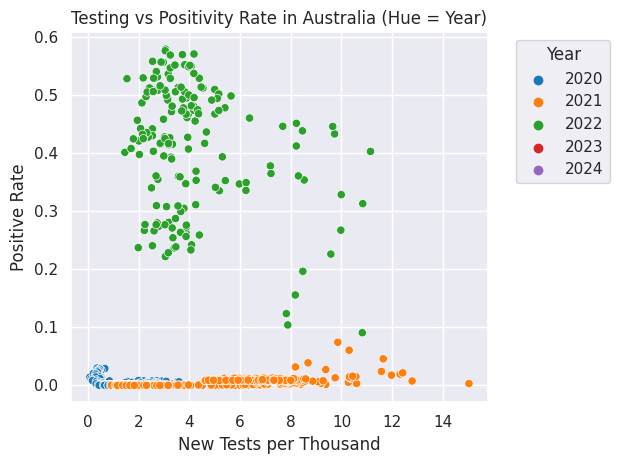

In [45]:
# Step 1: Extract year from date
df_Aus['year'] = pd.to_datetime(df_Aus['date']).dt.year.astype(str)

# Step 2: Scatterplot with year as hue
sns.scatterplot(
    data=df_Aus,
    x='new_tests_per_thousand',
    y='positive_rate',
    hue='year',
    palette='tab10'
)

plt.title('Testing vs Positivity Rate in Australia (Hue = Year)')
plt.xlabel('New Tests per Thousand')
plt.ylabel('Positive Rate')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Did COVID Vaccinations Help Reduce the Positive Rate in Australia?

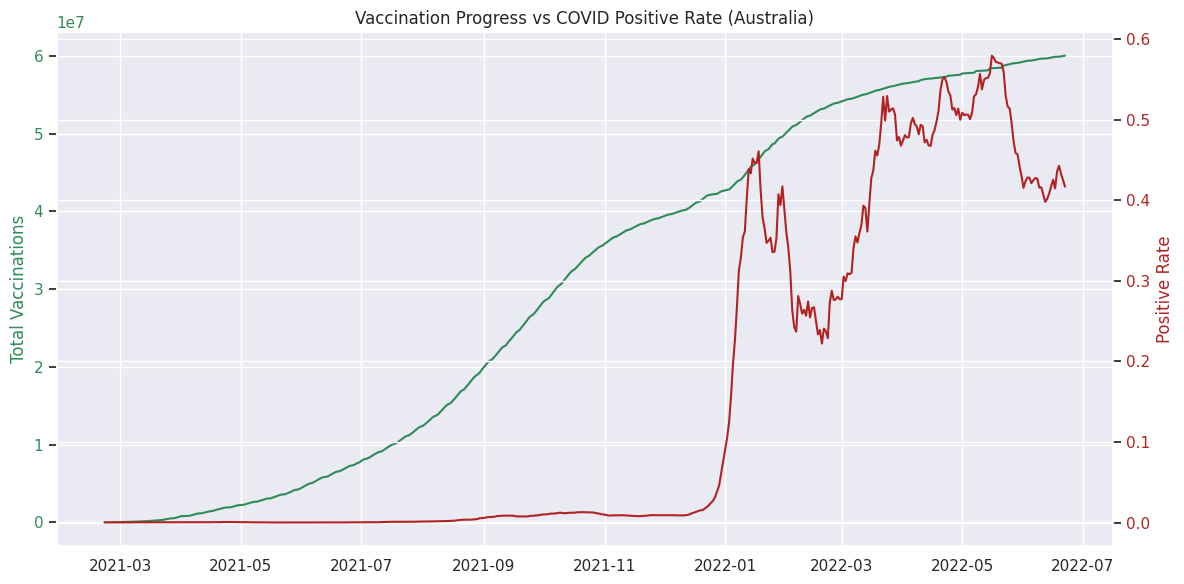

In [46]:
plot_df = df_Aus[['date', 'total_vaccinations', 'positive_rate']].dropna()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Vaccinations
ax1.plot(plot_df['date'], plot_df['total_vaccinations'], color='seagreen', label='Total Vaccinations')
ax1.set_ylabel('Total Vaccinations', color='seagreen')
ax1.tick_params(axis='y', labelcolor='seagreen')

# Positive Rate
ax2 = ax1.twinx()
ax2.plot(plot_df['date'], plot_df['positive_rate'], color='firebrick', label='Positive Rate')
ax2.set_ylabel('Positive Rate', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Vaccination Progress vs COVID Positive Rate (Australia)')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


## How Do Reported COVID Deaths Compare to Excess Mortality in Australia?

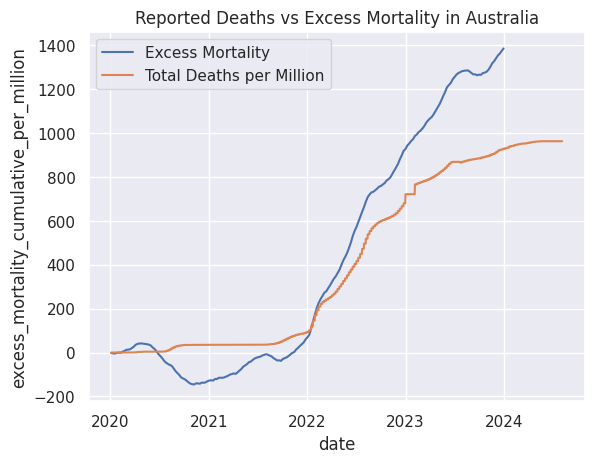

In [47]:
sns.lineplot(data=df_Aus, x='date', y='excess_mortality_cumulative_per_million', label='Excess Mortality')
sns.lineplot(data=df_Aus, x='date', y='total_deaths_per_million', label='Total Deaths per Million')
plt.title('Reported Deaths vs Excess Mortality in Australia')
plt.legend()
plt.show()

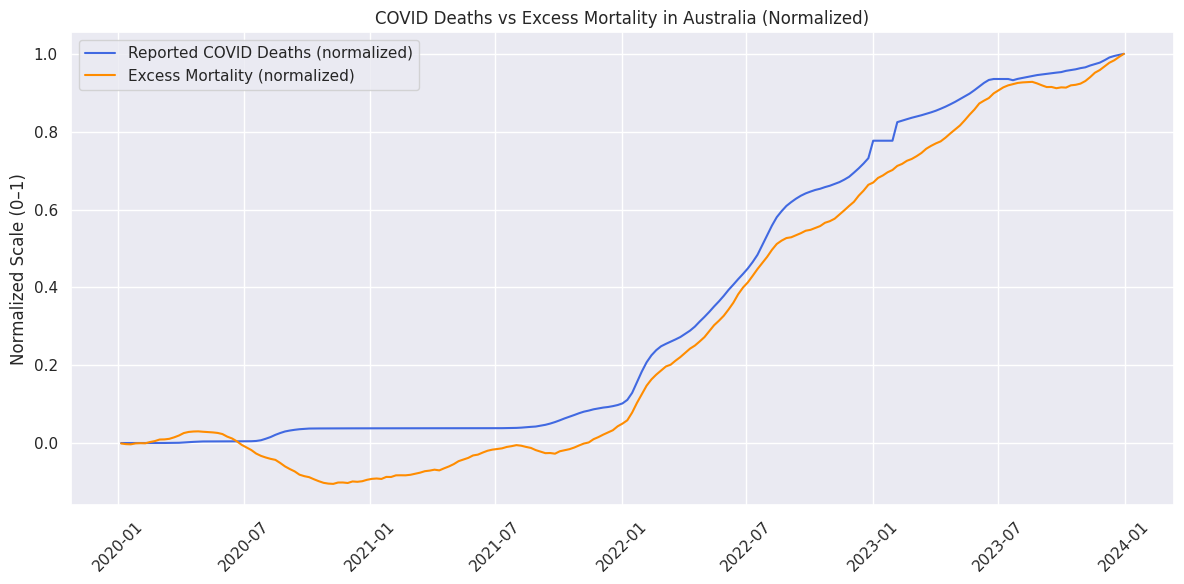

In [48]:
# Step 1: Drop rows with missing mortality data
df_Aus_clean = df_Aus[['date', 'total_deaths_per_million', 'excess_mortality_cumulative_per_million']].dropna()

# Step 2: Normalize
df_Aus_clean['reported_norm'] = df_Aus_clean['total_deaths_per_million'] / df_Aus_clean['total_deaths_per_million'].max()
df_Aus_clean['excess_norm'] = df_Aus_clean['excess_mortality_cumulative_per_million'] / df_Aus_clean['excess_mortality_cumulative_per_million'].max()

# Step 3: Plot
plt.figure(figsize=(12, 6))
plt.plot(df_Aus_clean['date'], df_Aus_clean['reported_norm'], label='Reported COVID Deaths (normalized)', color='royalblue')
plt.plot(df_Aus_clean['date'], df_Aus_clean['excess_norm'], label='Excess Mortality (normalized)', color='darkorange')
plt.ylabel('Normalized Scale (0–1)')
plt.title('COVID Deaths vs Excess Mortality in Australia (Normalized)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# See what variables relate most to each other
df_Aus[['new_cases_per_million', 'positive_rate', 'stringency_index',
              'people_fully_vaccinated_per_hundred', 'hospital_beds_per_thousand',
              'diabetes_prevalence', 'aged_70_older']].corr()


,new_cases_per_million,positive_rate,stringency_index,people_fully_vaccinated_per_hundred,hospital_beds_per_thousand,diabetes_prevalence,aged_70_older
new_cases_per_million,1.000000,0.316177,-0.118822,0.222753,NaN,NaN,NaN
positive_rate,0.316177,1.000000,-0.686848,0.740149,NaN,NaN,NaN
stringency_index,-0.118822,-0.686848,1.000000,-0.379740,NaN,NaN,NaN
people_fully_vaccinated_per_hundred,0.222753,0.740149,-0.379740,1.000000,NaN,NaN,NaN
hospital_beds_per_thousand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diabetes_prevalence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aged_70_older,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_plot = df_Aus[['date', 'icu_patients', 'people_fully_vaccinated']].dropna()


## How Did COVID ICU Admissions Respond to Vaccination Progress in Australia?

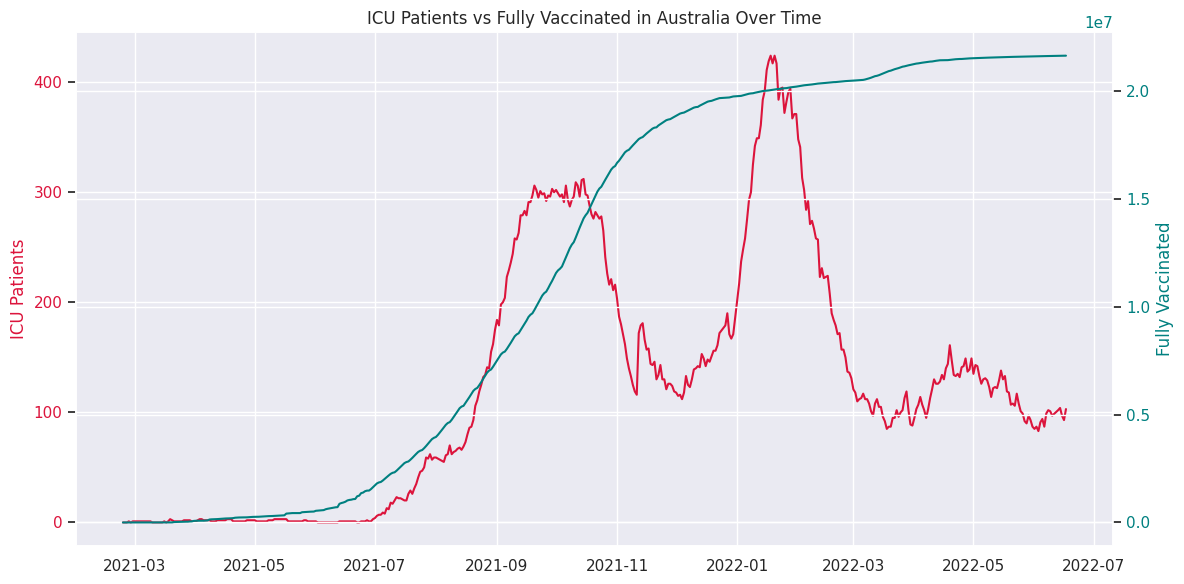

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis: ICU Patients
ax1.plot(df_plot['date'], df_plot['icu_patients'], color='crimson', label='ICU Patients')
ax1.set_ylabel('ICU Patients', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

# Second y-axis: Fully Vaccinated
ax2 = ax1.twinx()
ax2.plot(df_plot['date'], df_plot['people_fully_vaccinated'], color='teal', label='Fully Vaccinated')
ax2.set_ylabel('Fully Vaccinated', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

# Title and layout
plt.title('ICU Patients vs Fully Vaccinated in Australia Over Time')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


## Did Government Restrictions Slow COVID Spread in Australia?

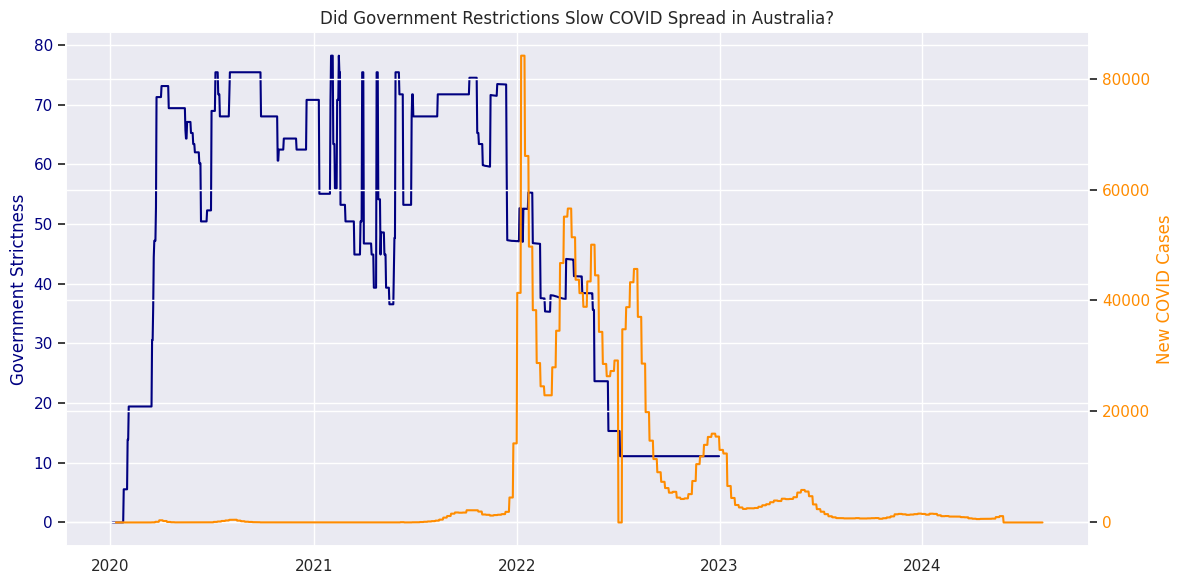

In [52]:
# Use 7-day average for cleaner trends
df_Aus['new_cases_7d'] = df_Aus['new_cases'].rolling(7).mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left axis: Stringency
ax1.plot(df_Aus['date'], df_Aus['stringency_index'], color='navy', label='Stringency Index')
ax1.set_ylabel('Government Strictness', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Right axis: Cases
ax2 = ax1.twinx()
ax2.plot(df_Aus['date'], df_Aus['new_cases_7d'], color='darkorange', label='New Cases (7d Avg)')
ax2.set_ylabel('New COVID Cases', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title('Did Government Restrictions Slow COVID Spread in Australia?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Between Key COVID-19 Metrics in Australia

Text(0.5, 1.0, 'COVID Metric Correlation (Australia)')

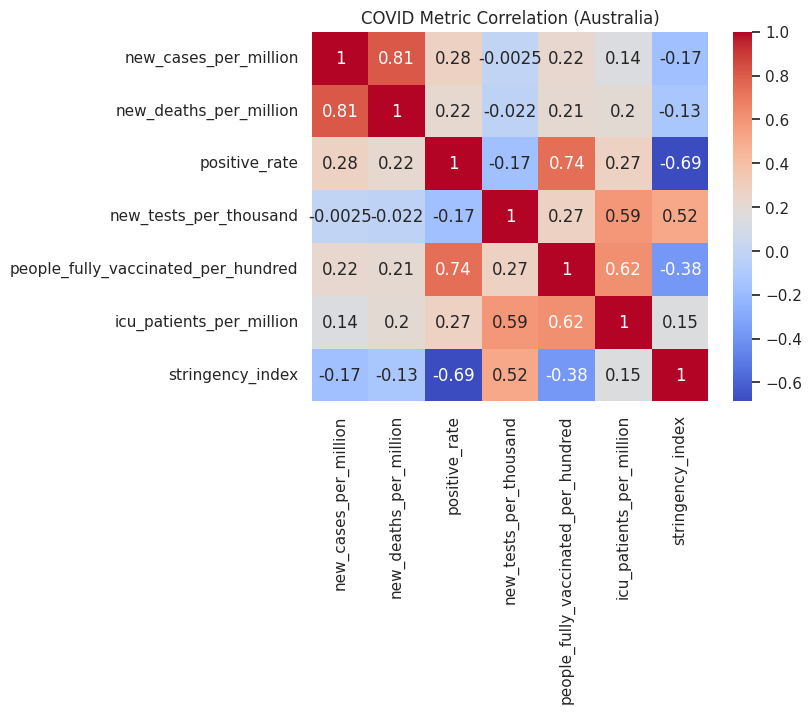

In [53]:
cols = ['new_cases_per_million', 'new_deaths_per_million', 'positive_rate',
        'new_tests_per_thousand', 'people_fully_vaccinated_per_hundred',
        'icu_patients_per_million', 'stringency_index']
sns.heatmap(df_Aus[cols].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('COVID Metric Correlation (Australia)')


In [54]:
df_Oceania.to_csv('df_Oceania(1) NTIG1.csv')
df_Aus.to_csv('df_Australia NTIG1.csv')

In [55]:
import os

src = 'df_Oceania(1) NTIG1.csv'
dst = '/kaggle/working/df_Oceania(1) NTIG1.csv'

if os.path.abspath(src) != os.path.abspath(dst):
    shutil.copy(src, dst)
else:
    print("Source and destination are the same. Skipping copy.")

Source and destination are the same. Skipping copy.


In [56]:
df_Oceania.to_csv('df_Oceania_final.csv', index=False)

In [57]:
from IPython.display import FileLink

FileLink(r'df_Oceania_final.csv')

/kaggle/working/df_Oceania_final.csv

In [58]:
import os

file_path = 'df_Oceania_final.csv'
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Deleted: {file_path}")
else:
    print("File does not exist.")

Deleted: df_Oceania_final.csv


# Thank You